In [1]:
import cv2
import skimage
import numpy as np
from scipy.ndimage import rotate
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [14]:
bicycle = cv2.imread("bicycle.bmp")
bird = cv2.imread("bird.bmp")
cat = cv2.imread("cat.bmp")
dog = cv2.imread("dog.bmp")
einstein = cv2.imread("einstein.bmp")
fish = cv2.imread("fish.bmp")
marylin = cv2.imread("marilyn.bmp")
motorcycle = cv2.imread("motorcycle.bmp")
plane = cv2.imread("plane.bmp")
submarine = cv2.imread("submarine.bmp")

bicycle = cv2.cvtColor(bicycle, cv2.COLOR_BGR2GRAY)
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2GRAY)
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
einstein = cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)
fish = cv2.cvtColor(fish, cv2.COLOR_BGR2GRAY)
marylin = cv2.cvtColor(marylin, cv2.COLOR_BGR2GRAY)
motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
plane = cv2.cvtColor(plane, cv2.COLOR_BGR2GRAY)
submarine = cv2.cvtColor(submarine, cv2.COLOR_BGR2GRAY)

In [15]:
bicycle = cv2.resize(bicycle, (512,512))
cat = cv2.resize(cat, (512,512))
dog = cv2.resize(dog, (512,512))
bird = cv2.resize(bird, (512,512))
fish =  cv2.resize(fish, (512,512))
marylin = cv2.resize(marylin, (512,512))
submarine = cv2.resize(submarine, (512,512))
plane = cv2.resize(plane, (512,512))
motorcycle = cv2.resize(motorcycle, (512,512))
# bicycle.shape

##### Defining angle range for radon transform

### 1. Radon Transform

In [17]:
def radon_transform_lite(image, angles):
    rows, cols = image.shape
    # Initialize an empty array to store the projections
    projections = np.zeros((len(angles), max(image.shape)), dtype=float)

    # Iterate through each angle and calculate the projection
    for i, angle in enumerate(angles):
        rotated_image = rotate(image, -angle, reshape=False)  # Use negative angle
        projections[i, :] = np.sum(rotated_image, axis=0)

    sinogram = np.transpose(projections)
    return sinogram

In [18]:
def radon_transform(image, angles, num_detectors):
    rows, cols = image.shape
    # to store the projections
    projections = np.zeros((len(angles), num_detectors), dtype=float)

    # Iterationg through each angle
    for i, angle in enumerate(angles):
        rotated_image = rotate(image, -angle, reshape = False)

        # to store projections for each detector count
        detector_projections = np.zeros(num_detectors, dtype=float)
        
        # Iterate through each detector position
        for j, pos in enumerate(np.linspace(-cols //2, cols//2, num_detectors, endpoint = False)):

              # Interpolating pixel values along detector position
            interp_func = interp1d(np.arange(-cols // 2, cols // 2), rotated_image[:, int(pos) + cols // 2], fill_value=0, bounds_error=False)
            
            detector_projections[j] = np.sum(interp_func(np.arange(-cols // 2, cols // 2)))

        projections[i, :] = detector_projections


    sinogram = np.transpose(projections)
    return sinogram



In [19]:
angles = np.linspace(0, 180, 360, endpoint=False)

(-0.5, 511.5, 511.5, -0.5)

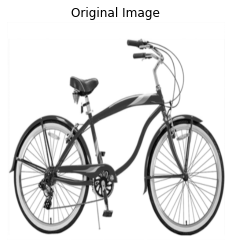

In [8]:
plt.imshow(bicycle, cmap='gray')
plt.title('Original Image')
plt.axis("off")

/home/hp/.local/lib/python3.8/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


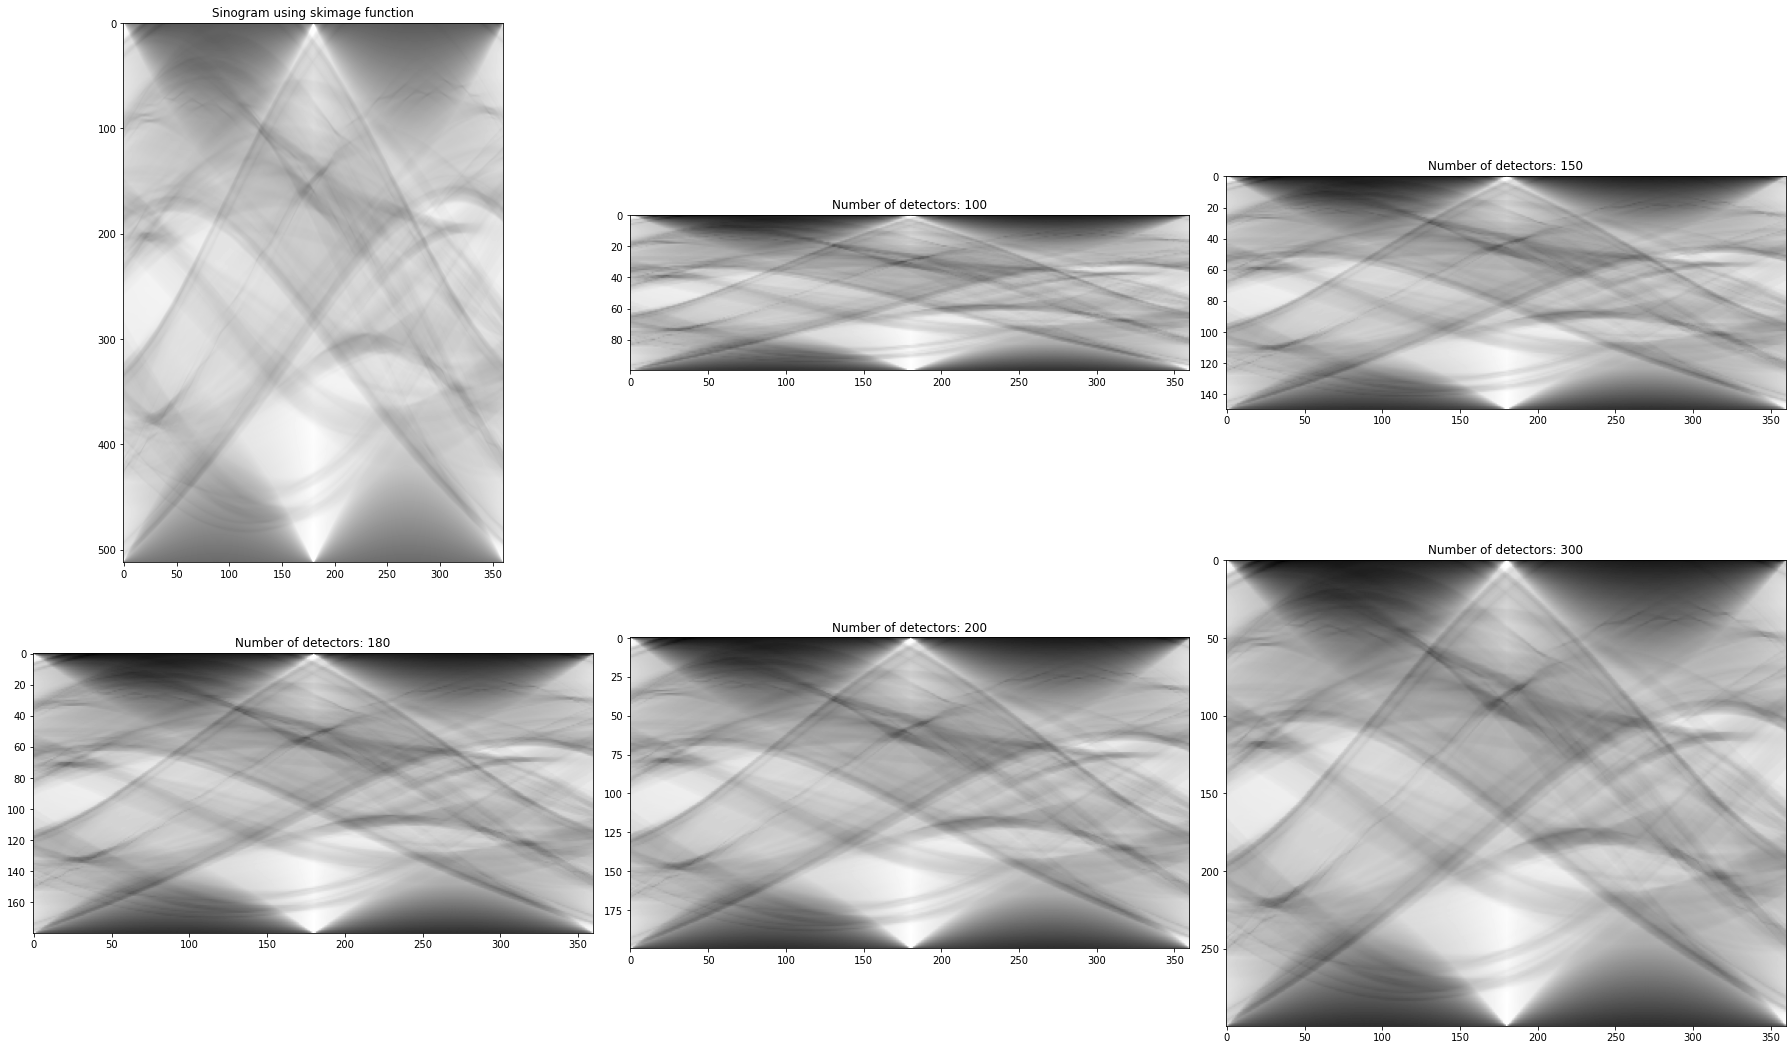

In [20]:
detectors = [100, 150, 180, 200, 300]
projections = []

for  i in range(5):
    sinogram = radon_transform(bicycle, angles, detectors[i])
    projections.append(sinogram)

inbuilt_sinogram = skimage.transform.radon(bicycle, theta=angles, circle=True)

plt.figure(figsize=(25, 15))

plt.subplot(2, 3, 1)
plt.imshow(inbuilt_sinogram, cmap='gray')
plt.title('Sinogram using skimage function')

# Plot the resulting images in the second row

for i in range(5):
    plt.subplot(2, 3, i + 2)
    plt.imshow(projections[i], cmap='gray')  # Change the cmap as needed
    plt.title(f'Number of detectors: {detectors[i]}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

(-0.5, 511.5, 511.5, -0.5)

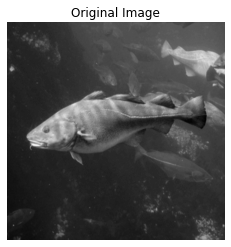

In [21]:
plt.imshow(fish, cmap='gray')
plt.title('Original Image')
plt.axis("off")

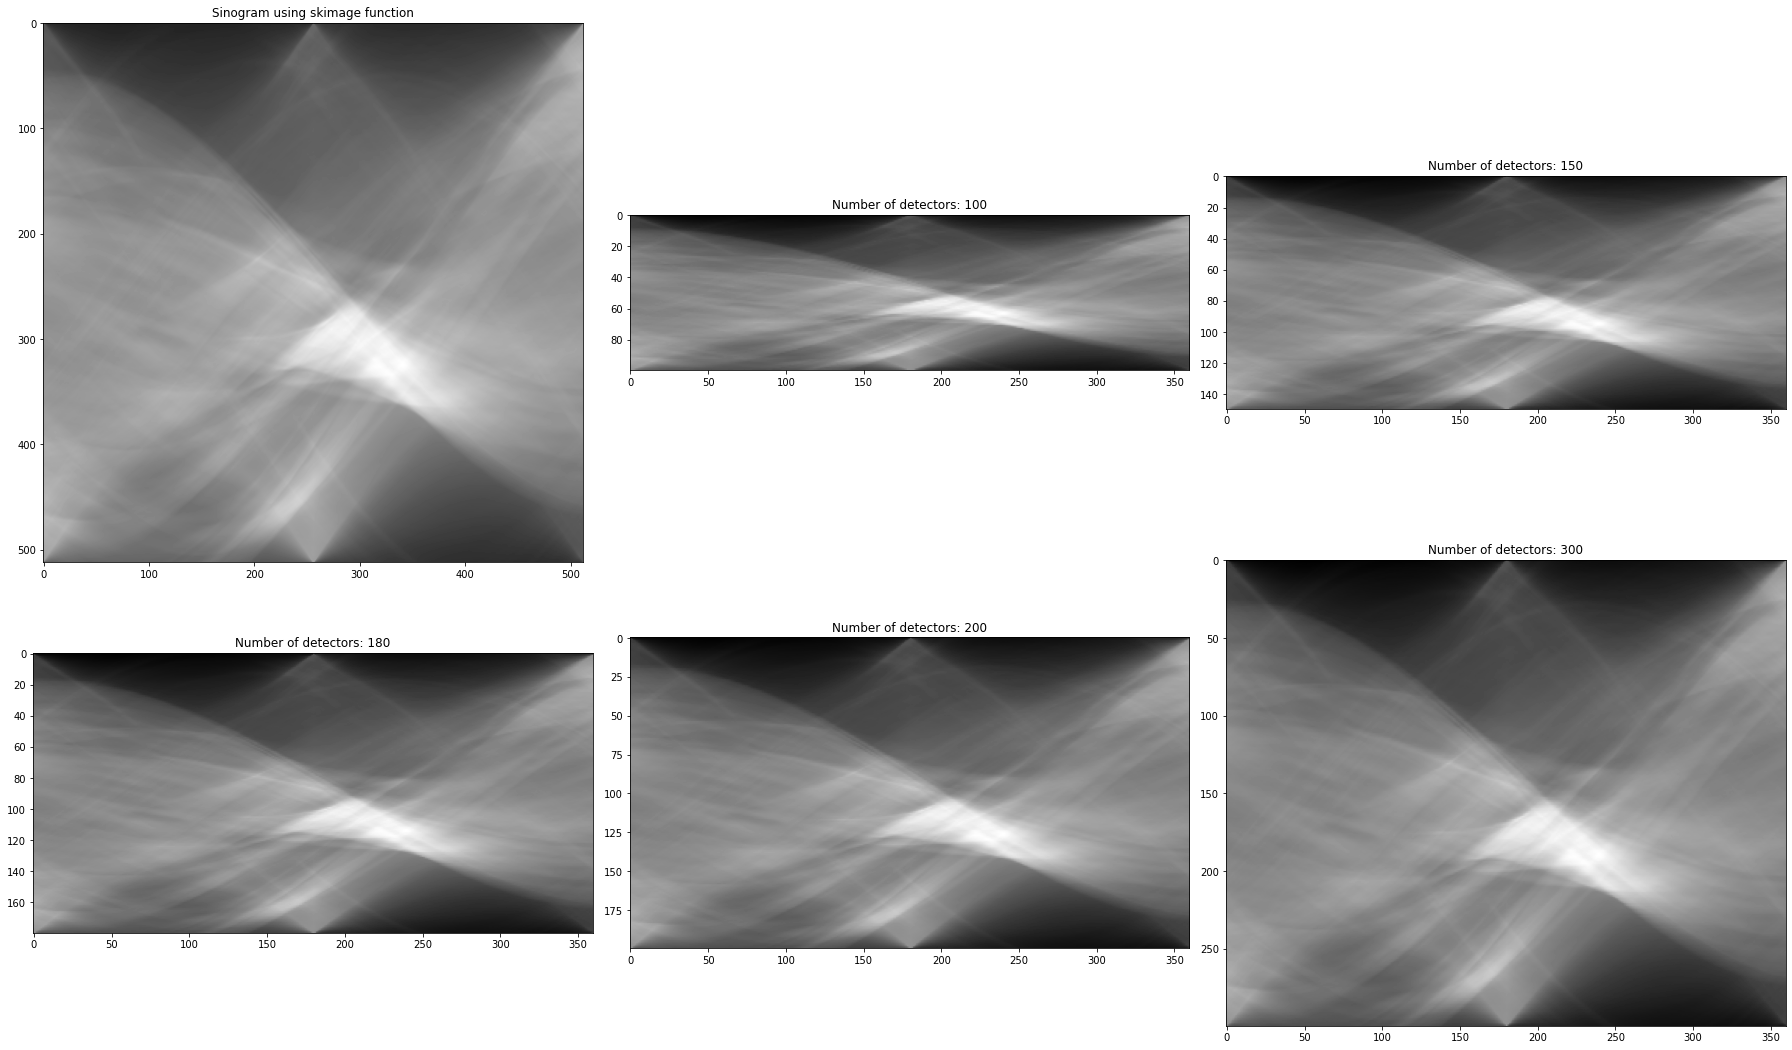

In [22]:
detectors = [100, 150, 180, 200, 300]
projections = []

for  i in range(5):
    sinogram = radon_transform(fish, angles, detectors[i])
    projections.append(sinogram)

inbuilt_sinogram = skimage.transform.radon(fish, theta=angles, circle=True)

plt.figure(figsize=(25, 15))

plt.subplot(2, 3, 1)
plt.imshow(inbuilt_sinogram, cmap='gray')
plt.title('Sinogram using skimage function')

# Plot the resulting images in the second row

for i in range(5):
    plt.subplot(2, 3, i + 2)
    plt.imshow(projections[i], cmap='gray')  # Change the cmap as needed
    plt.title(f'Number of detectors: {detectors[i]}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

(-0.5, 511.5, 511.5, -0.5)

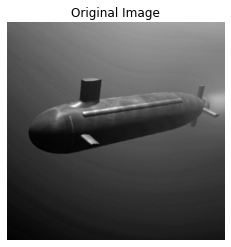

In [108]:
plt.imshow(submarine, cmap='gray')
plt.title('Original Image')
plt.axis("off")

/home/hp/.local/lib/python3.8/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


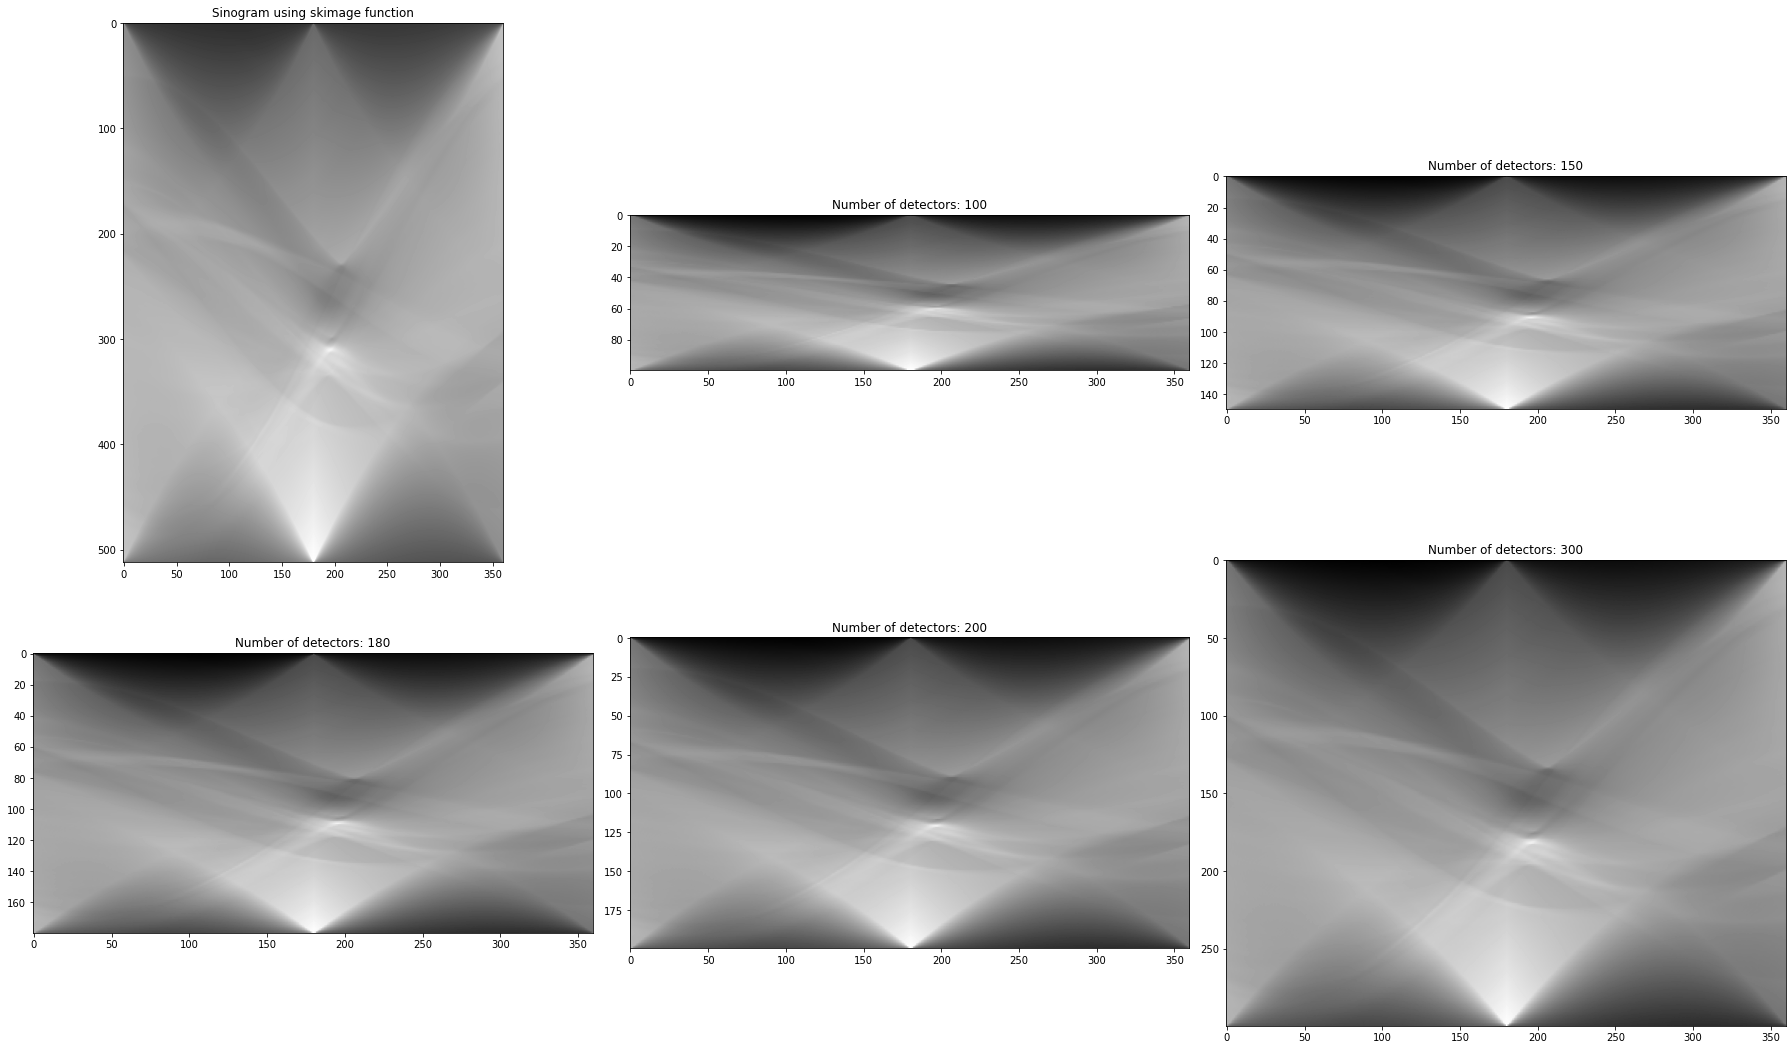

In [23]:
detectors = [100, 150, 180, 200, 300]
projections = []

for  i in range(5):
    sinogram = radon_transform(submarine, angles, detectors[i])
    projections.append(sinogram)

inbuilt_sinogram = skimage.transform.radon(submarine, theta=angles, circle=True)

plt.figure(figsize=(25, 15))

plt.subplot(2, 3, 1)
plt.imshow(inbuilt_sinogram, cmap='gray')
plt.title('Sinogram using skimage function')

# Plot the resulting images in the second row

for i in range(5):
    plt.subplot(2, 3, i + 2)
    plt.imshow(projections[i], cmap='gray')  # Change the cmap as needed
    plt.title(f'Number of detectors: {detectors[i]}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()